In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('E:\\PURWADHIKA\\Capstone module 2\\Supermarket Customers.csv', delimiter='\t')

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Menambahkan kolom kategori berdasarkan kolom recency

## DATA CLEANSING
- Mencari tahu data yang bernilai null terlebih dahulu.
- Mencari tahu data tersebut baiknya dihiilangkan atau diisi. Jika diisi lebih baik dengan apa.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

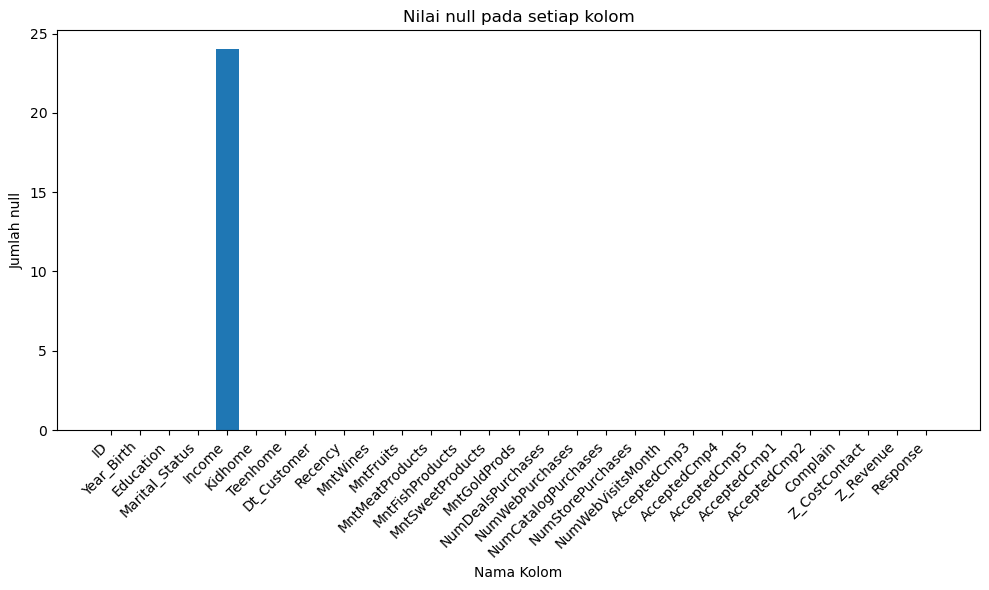

In [7]:
hitung_na = df.isnull().sum()

plt.figure(figsize=(10, 6))
plt.bar(hitung_na.index, hitung_na.values)
plt.title("Nilai null pada setiap kolom")
plt.xlabel("Nama Kolom")
plt.ylabel("Jumlah null")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Dari barplot diatas terlihat jika null hanya terletak di tabel income.

- Cek apakah duplikat data

In [8]:
duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty: #kondisi JIka ada data duplicate 
    print("Terdapat data ganda dalam DataFrame.")
    print("Berikut adalah baris-baris yang merupakan duplikat:")
    print(duplicate_rows)
else: #Jika tidak ada
    print("Tidak terdapat data ganda dalam DataFrame.")

Tidak terdapat data ganda dalam DataFrame.


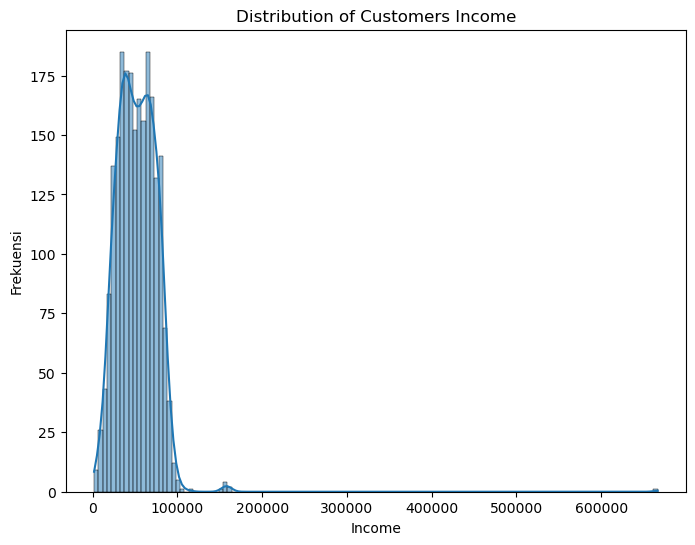

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'], kde=True)
plt.xlabel('Income')
plt.ylabel('Frekuensi')
plt.title('Distribution of Customers Income')
plt.show()

Bedasarkan barplot diatas, distribusi data untuk customer income terdistribusi tidak normal (skewed kanan).
Oleh karena itu untuk mendapatkan penghitungan yang tepat saya mengisi Na dengan nilai Mediannya

In [10]:
df['Income'] = df['Income'].fillna(df['Income'].median())

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
# Cek apakah ada data ganda di Dataframe df (data supermarket Customer).
duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty:
    print("Terdapat data ganda dalam DataFrame.")
    print("Berikut adalah baris-baris yang merupakan duplikat:")
    print(duplicate_rows)
else:
    print("Tidak terdapat data ganda dalam DataFrame.")

Tidak terdapat data ganda dalam DataFrame.


## Menambahkan kolom
Mengambil tanggal maksimal pada kolom Dt_Customer (tanggal registrasi)
- untuk membuat length dan juga mendapatkan 'analisis date'

In [13]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [14]:
import datetime

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y') #mengubah format Dt_Customer menjadi datetime

# Mengambil tanggal maksimum dari kolom 'Dt_Customer' dan menambahkannya dengan 1 hari untuk didefinisikan sebagai tanggal analisis
analysis_date = df['Dt_Customer'].max() + datetime.timedelta(1) #mengambil data Dt_Cust tertinggi + 1 hari dan didefinisikan kedalam variable
analysis_date

Timestamp('2014-06-30 00:00:00')

- Membuat kolom Total_Frequency berdasarkan data purchases customer

In [15]:
# Menambahakan kolom baru 'Recency' ke dalam DataFrame df yang sum dari num catalog, num store, num web, dan num deals
df['Total_Frequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Frequency
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,25
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,19


- membuat kolom monetary berdaskan pada data Mnt (Amount setiap product)

In [16]:
# Menambahkan kolom baru 'Monetary' ke dalam DataFrame df yang merupakan jumlah dari kolom-kolom yang berhubungan dengan pengeluaran pelanggan
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Frequency,Monetary
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,25,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,6,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,21,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,8,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,19,422


In [17]:
# menambahkan kolom baru 'Age' ke dalam DataFrame df yang merupakan selisih antara tahun analisis dan tahun lahir pelanggan
df['Age'] = analysis_date.year - df['Year_Birth']

In [48]:
# menambahkan kolom kategori recency 
def cat_recency(recency):
    if recency <= 30:
        return 'sangat aktif'
    elif 30 < recency <= 60:
        return 'aktif'
    elif 60 < recency <= 90:
        return 'sangat lama'
    elif recency > 90:
        return 'tidak aktif'

df['category_recency'] = df['Recency'].apply(cat_recency)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Frequency,Monetary,Age,category_recency,total_accepted_cmp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,25,1617,57,aktif,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,6,27,60,aktif,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,21,776,49,sangat aktif,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,8,53,30,sangat aktif,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,19,422,33,tidak aktif,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,18,1341,47,aktif,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,22,444,68,aktif,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,19,1241,33,tidak aktif,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,23,843,58,sangat aktif,0


- Melakukan export data yang sudah dicleansing dan juga ditambhakan beberapa tabel

In [49]:
df.to_csv('data_supermartket_cust_clean.csv', index=False)

## LRFM
Membuat sebuah dataframe customer dengan isi :
- length (analysis_date - tanggal registrasi terakhir + 1 ),
- recency paling sedikit,
- total frequency, total monetary

In [18]:
df_customer = df.groupby('ID').agg(
    length=('Dt_Customer', lambda x: (analysis_date - x.min()).days),
    recency=('Recency', lambda x: (x.min())),
    frequency=('Total_Frequency', 'sum'),
    monetary=('Monetary', 'sum'),
)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary
ID,,,,
1612,395,82,8,47
498,148,28,7,57
10591,693,37,11,201
6202,633,78,26,1005
5221,576,93,26,879


Membuat segmentasi untuk lengthnya

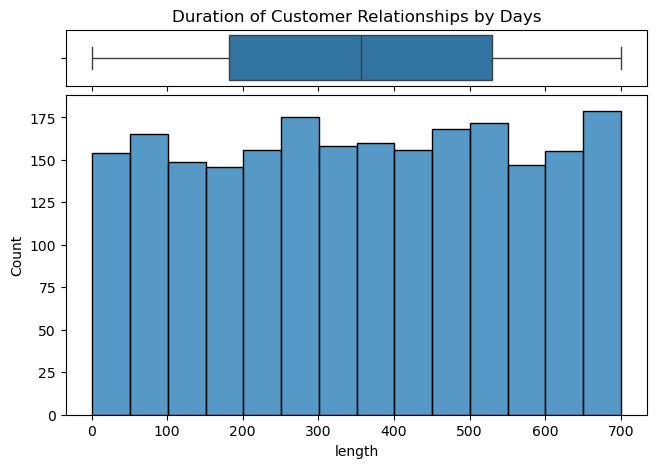

0.00      1.00
0.25    181.75
0.50    356.50
0.75    530.00
1.00    700.00
Name: length, dtype: float64

In [19]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='length', ax=ax_top)
sns.histplot(data=df_customer, x='length', ax=ax_bot)

ax_top.set(
    title='Duration of Customer Relationships by Days'
)

plt.show()
display(df_customer['length'].quantile([0, 0.25, 0.5, 0.75, 1]))

In [20]:
df_customer['l_score'] = pd.qcut(
    df_customer['length'],              # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk length: semakin lama, maka semakin besar skornya
).astype(int)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score
ID,,,,,
1612,395,82,8,47,3
498,148,28,7,57,1
10591,693,37,11,201,4
6202,633,78,26,1005,4
5221,576,93,26,879,4


Membuat segmentasi untuk recency

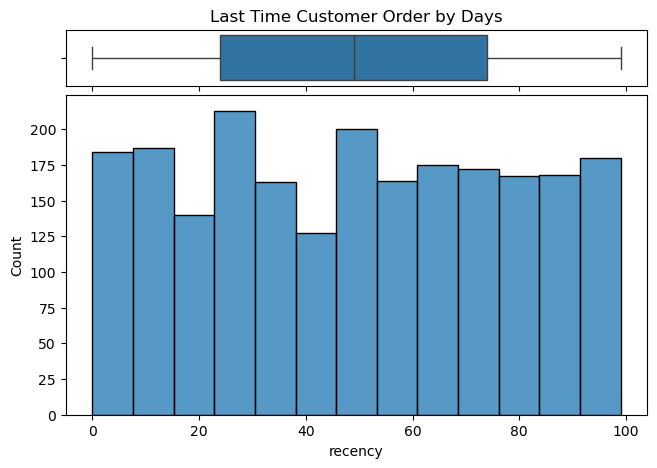

0.00     0.0
0.25    24.0
0.50    49.0
0.75    74.0
1.00    99.0
Name: recency, dtype: float64

In [21]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='recency', ax=ax_top)
sns.histplot(data=df_customer, x='recency', ax=ax_bot)

ax_top.set(
    title='Last Time Customer Order by Days'
)

plt.show()
display(df_customer['recency'].quantile([0, 0.25, 0.5, 0.75, 1]))

In [22]:
def r_score(x): #untuk recency dibagi perbulan, semakin rendah recency maka semakin tinggi skornya
    if x <= 30:
        return 4
    elif 30 < x <= 60:
        return 3
    elif 60 < x <= 90:
        return 2
    else:
        return 1

df_customer['r_score'] = df_customer['recency'].apply(r_score)
df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score
ID,,,,,,
1612,395,82,8,47,3,2
498,148,28,7,57,1,4
10591,693,37,11,201,4,3
6202,633,78,26,1005,4,2
5221,576,93,26,879,4,1


Membuat segmentasi frequency

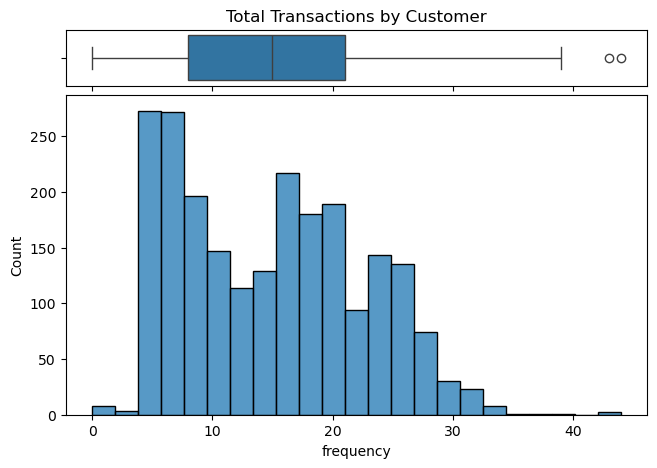

0.00     0.0
0.25     8.0
0.50    15.0
0.75    21.0
1.00    44.0
Name: frequency, dtype: float64

In [23]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='frequency', ax=ax_top)
sns.histplot(data=df_customer, x='frequency', ax=ax_bot)

ax_top.set(
    title='Total Transactions by Customer'
)

plt.show()
display(df_customer['frequency'].quantile([0, 0.25, 0.5, 0.75, 1]))

In [24]:
df_customer['f_score'] = pd.qcut(
    df_customer['frequency'],             # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk freq: semakin besar, maka semakin besar skornya
).astype(int)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score
ID,,,,,,,
1612,395,82,8,47,3,2,1
498,148,28,7,57,1,4,1
10591,693,37,11,201,4,3,2
6202,633,78,26,1005,4,2,4
5221,576,93,26,879,4,1,4


Membuat segmentas Monetary

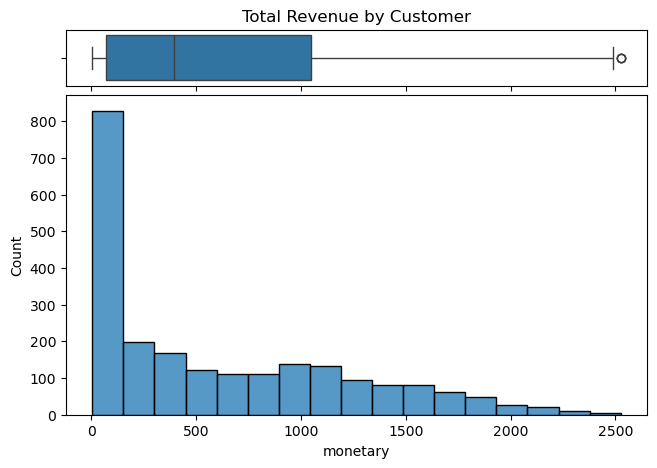

0.00       5.00
0.25      68.75
0.50     396.00
0.75    1045.50
1.00    2525.00
Name: monetary, dtype: float64

In [25]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='monetary', ax=ax_top)
sns.histplot(data=df_customer, x='monetary', ax=ax_bot)

ax_top.set(
    title='Total Revenue by Customer'
)

plt.show()
display(df_customer['monetary'].quantile([0, 0.25, 0.5, 0.75, 1]))

In [26]:
df_customer['m_score'] = pd.qcut(
    df_customer['monetary'],            # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk monetary: semakin besar, maka semakin besar skornya
).astype(int)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score
ID,,,,,,,,
1612,395,82,8,47,3,2,1,1
498,148,28,7,57,1,4,1,1
10591,693,37,11,201,4,3,2,2
6202,633,78,26,1005,4,2,4,3
5221,576,93,26,879,4,1,4,3


Membuat segmentasi LRFM menggunakan KMeans (KNN)

In [27]:
# import library yang dibutuhkan
from sklearn.cluster import KMeans

# mendefinisikan model kmeans dengan jumlah cluster 3
model = KMeans(n_clusters=3, random_state=42)

# fitting model
model.fit(df_customer.loc[:, 'length':'monetary'])

# menambahkan label
df_customer['lrfm_segment_clustering'] = model.labels_.astype(str)
df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_segment_clustering
ID,,,,,,,,,
1612,395,82,8,47,3,2,1,1,0
498,148,28,7,57,1,4,1,1,0
10591,693,37,11,201,4,3,2,2,0
6202,633,78,26,1005,4,2,4,3,1
5221,576,93,26,879,4,1,4,3,1


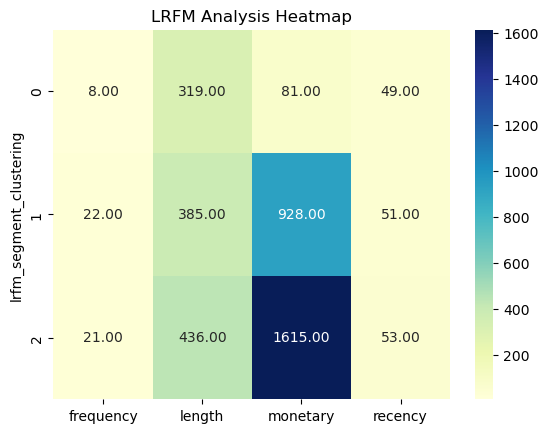

In [28]:
lrfm_heatmap = df_customer.pivot_table(index='lrfm_segment_clustering', values=['length', 'recency', 'frequency', 'monetary'], aggfunc='median')

# Create the heatmap
sns.heatmap(lrfm_heatmap, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('LRFM Analysis Heatmap')
plt.show()

In [29]:
import plotly.express as px

color_map = {
    '0' : 'red',
    '1' : 'green',
    '2' : 'blue',
}

fig = px.scatter_3d(
    df_customer,
    x='recency',
    y='frequency',
    z='monetary',
    color='lrfm_segment_clustering',
    color_discrete_map=color_map,
)

fig.update_traces(marker_size = 3)


fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
                    'text': "RFM segmentation",
                    'y':0.97,
                    'x':0.45,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                    legend=dict(
                      yanchor="top",
                      y=0.97,
                      xanchor="left",
                      x=0.70,
                      itemsizing='constant',
                      itemwidth = 30))

fig.update_xaxes(tickformat=".0f")

- dari heatmap dan scatter plot di atas bisa dibuat tabel seperti berikut:

Customer Segmentation Analysis

| **Segments** | **Characteristic** | **Goal** | **Strategies** | **Indicator** |
| :---------- | :-------------------------------------------------------------------------------------------------------- | :---------------------------------------------------- | :-------------------------------------------------------------------------------------------------------------------- | :---------------------------------------- |
| **Segment 2** | Nilai Monetary sangat tinggi, length moderate, frequency sangat rendah, recency rendah (score 3) | Kembangkan customer baru pada segmen ini untuk bisa menjadi loyal customer. | Membuat sistem membership dengan berbagai keuntungan untuk meningkatkan frequency pembelian + loyalty. | Length = high, Freq = high |
| **Segment 1** | Nilai monetary, length dan frequency tinggi, dan recency rendah | Fokus pada mempertahankan engagement dan kepuasan segmen ini. | Menawarkan diskon progresif pada setiap pembelian. | Monetary = high, Recency = low |
| **Segment 0** | Nilai Freq, Length, Monetary cenderung rendah, recency paling rendah dari segment yang lain. | Meningkatkan nilai transaksi customer dalam segment ini. | Memberikan pengalaman berbelanja yang baik. | Monetary = high, Freq = high, Length = high |

---

In [30]:
df_customer.reset_index(drop=False, inplace=True)
df_customer

,ID,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_segment_clustering
0,0,422,66,17,1198,3,2,3,4,1
1,1,15,0,18,577,1,4,3,3,1
2,9,681,86,11,120,4,2,2,2,0
3,13,343,57,6,32,2,3,1,1,0
4,17,297,81,28,1028,2,2,4,3,1
...,...,...,...,...,...,...,...,...,...,...
2235,11178,99,69,5,32,1,2,1,1,0
2236,11181,305,85,0,8,2,2,1,1,0
2237,11187,406,23,9,69,3,4,2,2,0
2238,11188,125,84,9,89,1,2,2,2,0


In [31]:
# Mengekspor DataFrame df_customer ke dalam file CSV
df_customer.to_csv('data_supermartket_cust_LRFM.csv', index=False)

## Visualisasi dan EDA

- Melihat banyaknya customer berdasarkan kategori recency (Semakin tinggi nilai semakin bagus recencynya)

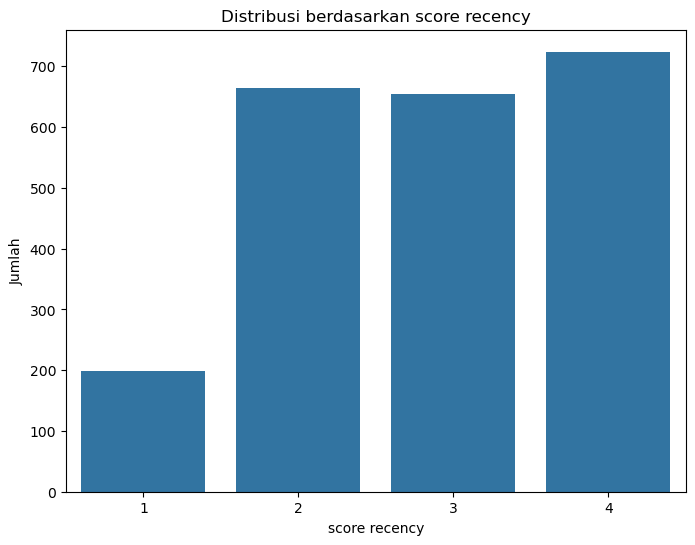

In [32]:
# Menghitung banyaknya kategori
jml_recency = df_customer['r_score'].value_counts()

# Membuat barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=jml_recency.index, y=jml_recency.values)
plt.xlabel('score recency')
plt.ylabel('Jumlah')
plt.title('Distribusi berdasarkan score recency')
plt.show()

- Melihat distribusi data dari kolom recency

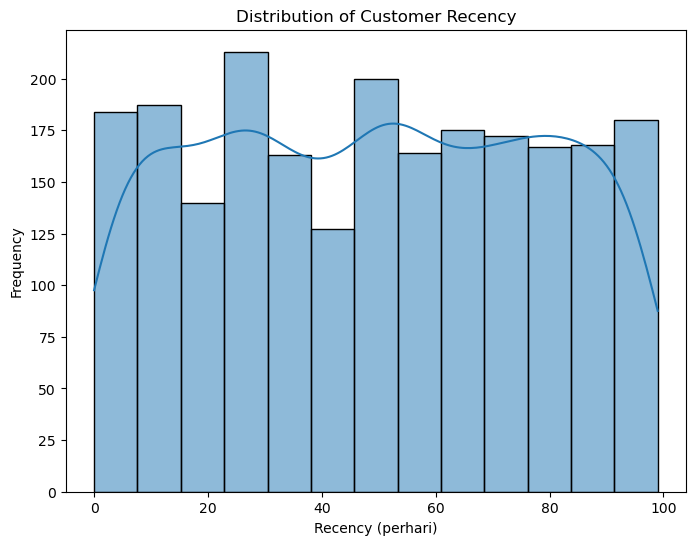

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Recency'], kde=True)
plt.xlabel('Recency (perhari)')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Recency')
plt.show()

- Membuat EDA berdasarkan Education + recency

In [35]:
pivot_table_edu = pd.pivot_table(df, 
                           values=['ID', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                           index=['category_recency', 'Education'],
                           aggfunc={'ID': 'count'})
pivot_table_edu

ID
category_recency Education      
aktif            2n Cycle     60
                 Basic        21
                 Graduation  321
                 Master      100
                 PhD         152
sangat aktif     2n Cycle     69
                 Basic        15
                 Graduation  358
                 Master      130
                 PhD         152
sangat lama      2n Cycle     52
                 Basic        14
                 Graduation  336
                 Master      114
                 PhD         148
tidak aktif      2n Cycle     22
                 Basic         4
                 Graduation  112
                 Master       26
                 PhD          34

- Membuat EDA berdasarkan Campaign diterima + data recency

In [36]:
pivot_table_AccCmp = pd.pivot_table(df,
                           values=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],
                           index='category_recency',
                           aggfunc={'ID': 'count',
                                    'AcceptedCmp1': 'sum',
                                    'AcceptedCmp2': 'sum',
                                    'AcceptedCmp3': 'sum',
                                    'AcceptedCmp4': 'sum',
                                    'AcceptedCmp5': 'sum',
                                    }
                             )
pivot_table_AccCmp

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,ID
category_recency,,,,,,
aktif,40,4,47,42,43,654
sangat aktif,51,11,63,52,57,724
sangat lama,43,12,41,55,48,664
tidak aktif,10,3,12,18,15,198


- Melihat nilai rata-rata income per kategori recency

In [37]:
pivot_table_income = pd.pivot_table(df, values='Income', index='category_recency', aggfunc='mean')
pivot_table_income

,Income
category_recency,
aktif,51352.068807
sangat aktif,53013.109116
sangat lama,52300.246235
tidak aktif,52120.997475


## Uji statistika

Melakukan uji korelasi terhadap Recency dengan income customer
- Ha : Recency dengan Income memiliki hubungan statistik yang signifikan.
- Ho : Recency dengan Income tidak memiliki hubungan statistik yang signifikan.

In [38]:
from scipy import stats

In [39]:
correlation_coefficient, p_value = stats.pearsonr(df['Recency'], df['Income'])

print(f"Koefisien Korelasi Pearson: {correlation_coefficient}")
print(f"Nilai p: {p_value}")

Koefisien Korelasi Pearson: -0.004060783385138607
Nilai p: 0.8476757319951471


In [40]:
alpha = 0.05 #nilai signifikansi
if p_value < alpha:
    print("Recency dengan Income memiliki hubungan statistik yang signifikan.")
else:
    print("Recency dengan Income tidak memiliki hubungan statistik yang signifikan.")

Recency dengan Income tidak memiliki hubungan statistik yang signifikan.


Melakukan uji korelasi terhadap Recency dengan income customer
- Ha : Recency dengan Acc_campaign memiliki hubungan statistik yang signifikan.
- Ho : Recency dengan Acc_campaign tidak memiliki hubungan statistik yang signifikan.

In [41]:
# Uji statistik antara total campaign yang diterima (AcceptedCmp1-5) dengan recency
df['total_accepted_cmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

correlation_cmp_recency, p_value_cmp_recency = stats.pearsonr(df['total_accepted_cmp'], df['Recency'])

print(f"Koefisien Korelasi Pearson: {correlation_cmp_recency}")
print(f"Nilai p: {p_value_cmp_recency}")

Koefisien Korelasi Pearson: -0.012569712889548982
Nilai p: 0.5521116704477966


In [42]:
if p_value_cmp_recency < alpha:
    print("Terdapat hubungan statistik yang signifikan antara total campaign diterima dengan recency.")
else:
    print("Tidak terdapat hubungan statistik yang signifikan antara total campaign diterima dengan recency.")

Tidak terdapat hubungan statistik yang signifikan antara total campaign diterima dengan recency.


Membuat table Monetary dengan Income

In [43]:
# Membuat tabel korelasi antara Monetary dan Income berdasarkan kategori recency
pivot_table_monetary_income = pd.pivot_table(
    df,
    values=['Monetary', 'Income'],
    index='ID',
    aggfunc='mean'
)
pivot_table_monetary_income

,Income,Monetary
ID,,
0,70951.0,1198.0
1,57091.0,577.0
9,46098.0,120.0
13,25358.0,32.0
17,60491.0,1028.0
...,...,...
11178,42394.0,32.0
11181,156924.0,8.0
11187,26487.0,69.0


Melakukan uji korelasi terhadap Monetary dengan income customer
- Ha : Monetary dengan Income memiliki hubungan statistik yang signifikan.
- Ho : monetary dengan Income tidak memiliki hubungan statistik yang signifikan.

In [44]:
correlation_coefficient, p_value = stats.pearsonr(df['Monetary'], df['Income'])

print(f"Koefisien Korelasi Pearson: {correlation_coefficient}")
print(f"Nilai p: {p_value}")

Koefisien Korelasi Pearson: 0.6647748566757212
Nilai p: 8.963852221844129e-286


In [45]:
alpha = 0.05 #nilai signifikansi
if p_value < alpha:
    print("Monetary dengan Income memiliki hubungan statistik yang signifikan.")
else:
    print("MOnetary dengan Income tidak memiliki hubungan statistik yang signifikan.")

Monetary dengan Income memiliki hubungan statistik yang signifikan.


Melakukan uji korelasi terhadap Monetary dengan pembayaran menggunakan diskon
- Ha : Monetary dengan num deals memiliki hubungan statistik yang signifikan.
- Ho : monetary dengan num deals tidak memiliki hubungan statistik yang signifikan.

In [46]:
correlation_monetary_deals, p_value_monetary_deals = stats.pearsonr(df['Monetary'], df['NumDealsPurchases'])

print(f"Koefisien Korelasi Pearson: {correlation_monetary_deals}")
print(f"Nilai p: {p_value_monetary_deals}")

Koefisien Korelasi Pearson: -0.06511194439133058
Nilai p: 0.002047795000217268


In [47]:
if p_value_monetary_deals < alpha:
    print("Monetary dengan NumDealsPurchases memiliki hubungan statistik yang signifikan.")
else:
    print("Monetary dengan NumDealsPurchases tidak memiliki hubungan statistik yang signifikan.")

Monetary dengan NumDealsPurchases memiliki hubungan statistik yang signifikan.
